In [1]:
import tensorflow
tensorflow.__version__

'2.3.0'

In [2]:
import random
import warnings

random.seed(0)
warnings.filterwarnings("ignore")

In [3]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Label: 0


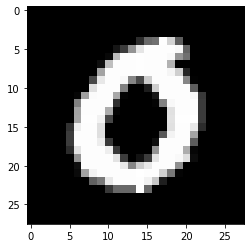

In [5]:
import matplotlib.pyplot as plt

%matplotlib inline

print("Label: {}".format(y_train[8000]))

plt.imshow(x_train[8000], cmap='gray');

In [6]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [7]:
# Reshape the data such that it is a single vector

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [8]:
# Set values as floats the maintain precision after division
# Normalize values

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [9]:
print('x_train shape: ', x_train.shape)
print('Images in training set: ', x_train.shape[0])
print('Images in test set: ', x_test.shape[0])
print('Max value in training set: ', x_train.max())
print('Min value in training set: ', x_train.min())

x_train shape:  (60000, 28, 28, 1)
Images in training set:  60000
Images in test set:  10000
Max value in training set:  1.0
Min value in training set:  0.0


In [10]:
# One-hot encode the class vector so that output cells are easily identifiable

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(y_train.shape)
print(y_train[0])

(60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [13]:
# Define a sequential model
# Add two convolutional layers
# Flatten the data
# Add two dense layers

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Activation, Flatten

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [16]:
# Compile and fit the model

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

model.fit(x=x_train, y=y_train, batch_size=128, epochs=2, validation_split=.3)

Epoch 1/2
329/329 [==============================] - 54s 165ms/step - loss: 0.0502 - accuracy: 0.9846 - val_loss: 0.0576 - val_accuracy: 0.9833
Epoch 2/2
329/329 [==============================] - 54s 164ms/step - loss: 0.0227 - accuracy: 0.9934 - val_loss: 0.0550 - val_accuracy: 0.9839


In [17]:
# Evaluate final loss and accuracy

model.evaluate(x_test, y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.0426 - accuracy: 0.9851 0s - loss: 0.0421 - accuracy


[0.0426461286842823, 0.9850999712944031]

In [18]:
# Now a model with pooling

# Define a sequential model
# Add two convolutional layers
# Add a max pooling layer
# Add a dropout layer
# Flatten the data
# Add two dense layers

from tensorflow.keras.layers import MaxPooling2D, Dropout

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [19]:
# Compile and fit the model

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2, min_delta=.01)

model.fit(x=x_train, y=y_train, batch_size=128, epochs=2, validation_data=(x_test, y_test), callbacks=[callback])

Epoch 1/2
469/469 [==============================] - 71s 151ms/step - loss: 0.1853 - accuracy: 0.9452 - val_loss: 0.0624 - val_accuracy: 0.9795
Epoch 2/2
469/469 [==============================] - 76s 161ms/step - loss: 0.0546 - accuracy: 0.9835 - val_loss: 0.0414 - val_accuracy: 0.9858


In [20]:
# Evaluate final loss and accuracy

model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.0414 - accuracy: 0.9858


[0.0413813553750515, 0.98580002784729]

Predicted label:  6
Softmax outputs:  [[6.0774208e-05 1.5614882e-05 2.2614665e-06 2.7035253e-06 2.6051871e-06
  1.1001162e-03 9.9872041e-01 1.7328379e-07 9.5107614e-05 4.1480311e-07]]
1.0000002


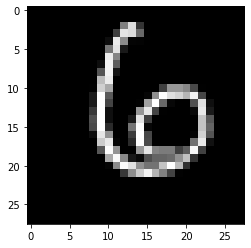

In [21]:
# Visualize the results

plt.imshow(x_test[100].reshape(28, 28), cmap='gray')

y_pred = model.predict(x_test[100].reshape(1, 28, 28, 1))

print('Predicted label: ', y_pred.argmax())
print('Softmax outputs: ', y_pred)
print(y_pred.sum())